<a href="https://colab.research.google.com/github/EntabotUk/Web-assignment/blob/main/MonthlyGoldPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

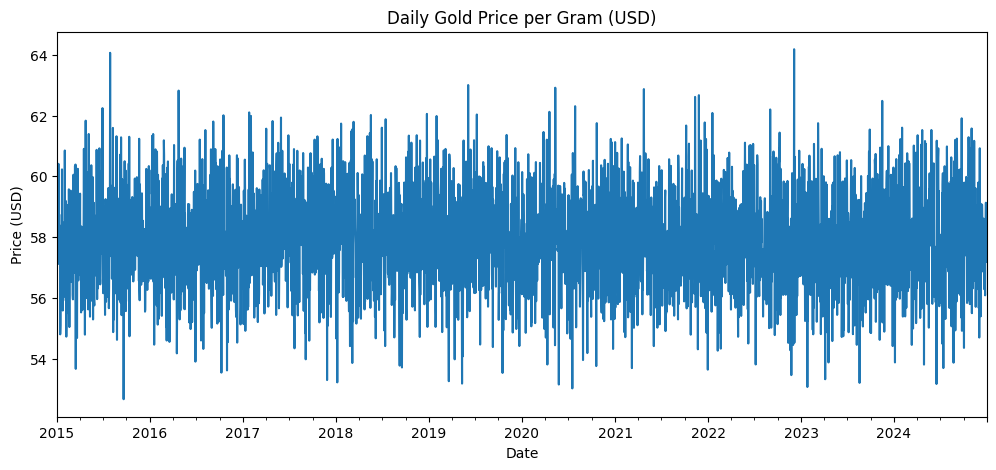

DEBUG:cmdstanpy:input tempfile: /tmp/tmpw0q3v8cz/7gooqyi5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw0q3v8cz/q78pb4ug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34261', 'data', 'file=/tmp/tmpw0q3v8cz/7gooqyi5.json', 'init=/tmp/tmpw0q3v8cz/q78pb4ug.json', 'output', 'file=/tmp/tmpw0q3v8cz/prophet_modelrre8zf3t/prophet_model-20250417021246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:12:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:12:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


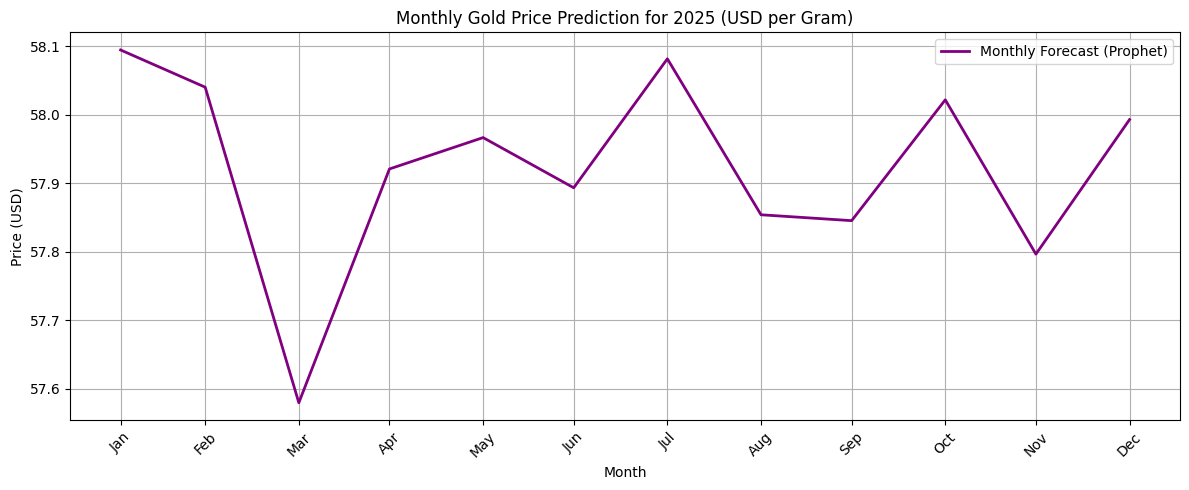

Predicted Monthly Gold Prices for 2025 (USD per gram):
          Month  Predicted_Price_USD_per_Gram
3653 2025-01-31                     58.094863
3654 2025-02-28                     58.040515
3655 2025-03-31                     57.579683
3656 2025-04-30                     57.921105
3657 2025-05-31                     57.966927
3658 2025-06-30                     57.893634
3659 2025-07-31                     58.081959
3660 2025-08-31                     57.854207
3661 2025-09-30                     57.845616
3662 2025-10-31                     58.022087
3663 2025-11-30                     57.796731
3664 2025-12-31                     57.993213


In [24]:
# simulate dataset to predict

# 📦 Install required packages
!pip install mlcroissant pandas matplotlib prophet --quiet

# 📚 Imports
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

# 🔁 Simulate realistic gold price dataset in USD/ounce (replace this with real data source if needed)
# Example: 2015–2024 daily gold price per ounce (simulate)
import numpy as np
date_range = pd.date_range(start='2015-01-01', end='2024-12-31', freq='D')
np.random.seed(42)
price_ounce = np.random.normal(loc=1800, scale=50, size=len(date_range))  # simulate daily prices
df = pd.DataFrame({'Date': date_range, 'Price_Oz': price_ounce})

# 🔄 Convert ounce to gram (1 oz ≈ 31.1035 grams)
df['Price_Gram_USD'] = df['Price_Oz'] / 31.1035

# 📅 Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'Price_Gram_USD']].dropna().sort_values('Date')
df = df.set_index('Date').asfreq('D')
df['Price_Gram_USD'].interpolate(method='linear', inplace=True)

# 📈 Plot daily gold price per gram (USD)
df['Price_Gram_USD'].plot(title='Daily Gold Price per Gram (USD)', figsize=(12, 5))
plt.ylabel("Price (USD)")
plt.show()

# 🔮 Forecasting using Prophet
df_prophet = df.reset_index().rename(columns={"Date": "ds", "Price_Gram_USD": "y"})
prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(df_prophet)

# ⏳ Monthly forecast for next 12 months
future_monthly = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast_monthly = prophet_model.predict(future_monthly)

# 📉 Filter for forecast only in 2025
forecast_2025 = forecast_monthly[(forecast_monthly['ds'].dt.year == 2025)]

# 🗓️ Plot: Monthly Gold Price Forecast (USD per gram)
plt.figure(figsize=(12, 5))
plt.plot(forecast_2025['ds'], forecast_2025['yhat'], label='Monthly Forecast (Prophet)', color='purple', linewidth=2)
plt.xticks(forecast_2025['ds'], forecast_2025['ds'].dt.strftime('%b'), rotation=45)
plt.title("Monthly Gold Price Prediction for 2025 (USD per Gram)")
plt.xlabel("Month")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 📋 Print monthly forecast
print("Predicted Monthly Gold Prices for 2025 (USD per gram):")
print(forecast_2025[['ds', 'yhat']].rename(columns={'ds': 'Month', 'yhat': 'Predicted_Price_USD_per_Gram'}))


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaevicq12/8jxchjdv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaevicq12/sw7zn3vj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=691', 'data', 'file=/tmp/tmpaevicq12/8jxchjdv.json', 'init=/tmp/tmpaevicq12/sw7zn3vj.json', 'output', 'file=/tmp/tmpaevicq12/prophet_model_o9nhp5t/prophet_model-20250417081058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:10:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:11:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


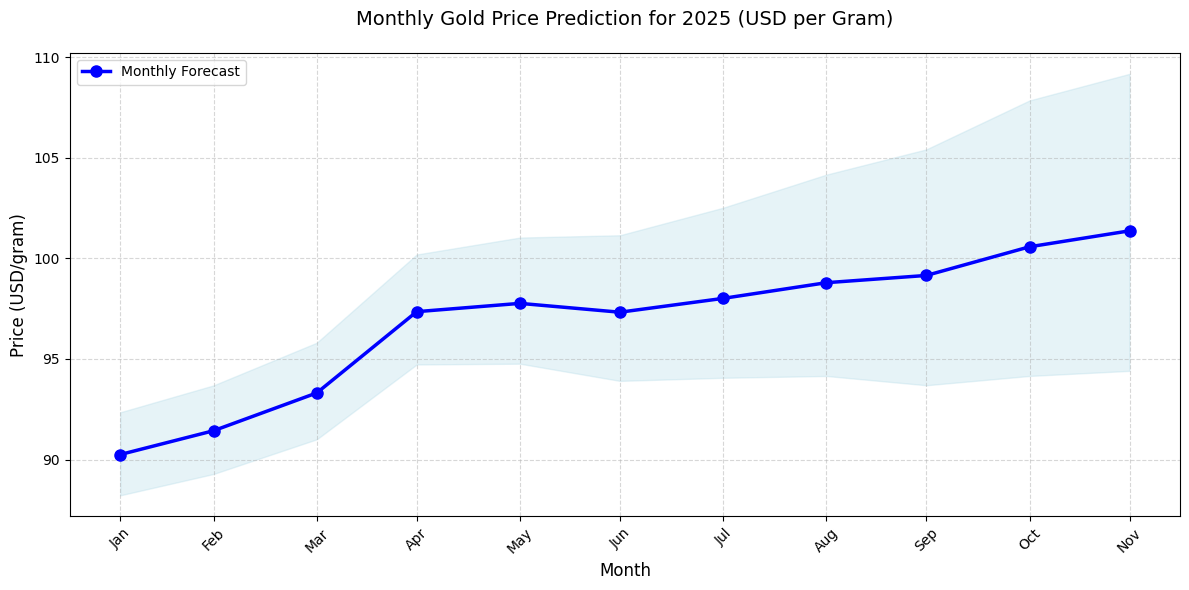


2025 Monthly Gold Price Forecast (USD/gram):
            Predicted  Low Estimate  High Estimate
ds                                                
2025-01-31      90.25         88.22          92.35
2025-02-28      91.43         89.28          93.69
2025-03-31      93.31         91.00          95.81
2025-04-30      97.35         94.73         100.20
2025-05-31      97.77         94.77         101.04
2025-06-30      97.33         93.91         101.15
2025-07-31      98.02         94.06         102.52
2025-08-31      98.80         94.15         104.17
2025-09-30      99.16         93.69         105.43
2025-10-31     100.58         94.16         107.86
2025-11-30     101.38         94.41         109.18


In [4]:
#Using Daily Gold Price (2015-2024) Time Series from Kaggle https://www.kaggle.com/datasets/nisargchodavadiya/daily-gold-price-20152021-time-series
# 📦 Install required packages
!pip install pandas matplotlib prophet --quiet

# 📚 Imports
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

# 📥 Load dataset
csv_path = '/dataset/Gold Price.csv'
df = pd.read_csv(csv_path)

# 🧹 Data Preparation
df['Date'] = pd.to_datetime(df['Date'])
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').ffill()

# 💱 Convert to USD/gram (assuming original is INR/10g)
df['Price_USD_per_Gram'] = df['Price'] / (10 * 83.0)  # 10g to 1g, INR to USD

# 🔮 Create and fit Prophet model
model = Prophet(
    yearly_seasonality=True,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05
)
model.fit(df.rename(columns={'Date': 'ds', 'Price_USD_per_Gram': 'y'}))

# 📅 Generate future dates
future = model.make_future_dataframe(periods=365)  # 1 year forecast
forecast = model.predict(future)

# 🎯 Filter for 2025 and aggregate monthly
forecast_2025 = forecast[forecast['ds'].dt.year == 2025]
monthly_2025 = forecast_2025.set_index('ds').resample('M').mean()

# 📊 Create the line graph
plt.figure(figsize=(12, 6))

# Plot the forecast line
plt.plot(monthly_2025.index, monthly_2025['yhat'],
         label='Monthly Forecast',
         color='blue',
         linewidth=2.5,
         marker='o',
         markersize=8)

# Add confidence interval
plt.fill_between(monthly_2025.index,
                monthly_2025['yhat_lower'],
                monthly_2025['yhat_upper'],
                color='lightblue',
                alpha=0.3)

# Formatting
plt.title('Monthly Gold Price Prediction for 2025 (USD per Gram)', fontsize=14, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price (USD/gram)', fontsize=12)
plt.xticks(monthly_2025.index, [d.strftime('%b') for d in monthly_2025.index], rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Display the numerical results
print("\n2025 Monthly Gold Price Forecast (USD/gram):")
print(monthly_2025[['yhat', 'yhat_lower', 'yhat_upper']].rename(
    columns={
        'yhat': 'Predicted',
        'yhat_lower': 'Low Estimate',
        'yhat_upper': 'High Estimate'
    }).round(2))

In [2]:
!pip install mlcroissant


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.4/141.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 10.6 MB/s eta 0:00:00
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15127 sha256=792d385d59a52be9d6176d0f5cfb782c707fdde1c574a2ef281c3d1464a48df2
  Stored in directory: /root/.cache/pip/wheels/53/cf/51/a4ea10224b7fdb523e18e2033cadf2a8657517d1f95f3f5413
Successfully built jsonpath-rw
